# PART 2
## Filter cells

Cells with low library size and low number of genes will be filtered out.

- **INPUT:**
    - ```$counts.RData``` 
    - ```anno_cells.RData```
    - ```anno_samples.RData```
    - ```anno_genes.RData```
    
- **NOTES:**

    The '_ctf' ending in the file names stands for cell type filter.
    
- **OUTPUT:**

    -  ```counts_cf.RData``` 
    -  ```anno_cells_cf.RData``` 
    -  ```anno_samples_cf.RData``` 
    -  ```anno_genes_cf.RData``` 

In [2]:
# paste(path_to_additional_files,tsv_file,sep="")

In [3]:
path_to_additional_files="/work/project/ladcol_006/analysis/AMLniche/comparativeAnalysis/scripts_for_paper/datasets/AML_healthy/additional_input_files/"

In [4]:
library("ggplot2")

In [5]:
# load raw counts
load("counts.RData")
print(dim(counts))

[1] 19303 98936


In [6]:
# load cell annotation
load("anno_cells.RData")
rownames(anno_cells) <- anno_cells$cell_ID
print(str(anno_cells))

'data.frame':	87333 obs. of  14 variables:
 $ cell_ID                       : chr  "AML1012-D0_AAAAAGTTACGT" "AML1012-D0_AAAACACCAATC" "AML1012-D0_AAAATAGCCTTT" "AML1012-D0_AAACATTAAACG" ...
 $ cell_type_original            : chr  "GMP" "GMP-like" "Prog-like" "ProMono-like" ...
 $ sample_ID                     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
 $ malignant                     : logi  FALSE TRUE TRUE TRUE TRUE TRUE ...
 $ patient_ID                    : chr  "AML1012" "AML1012" "AML1012" "AML1012" ...
 $ dataset                       : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender                        : chr  "F" "F" "F" "F" ...
 $ age                           : int  32 32 32 32 32 32 32 32 32 32 ...
 $ health_status                 : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control               : chr  "case" "case" "case" "case" ...
 $ day                           : int  0 0 0 0 0 0 0 0 0 0 ...
 $ cell_type                     : 

In [7]:
# load sample annotation
load("anno_samples.RData")
print(str(anno_samples))

'data.frame':	35 obs. of  8 variables:
 $ sample_ID      : chr  "AML1012-D0" "AML210A-D0" "AML328-D0" "AML419A-D0" ...
 $ patient_ID     : chr  "AML1012" "AML210A" "AML328" "AML419A" ...
 $ dataset        : chr  "GSE116256" "GSE116256" "GSE116256" "GSE116256" ...
 $ gender         : chr  "F" "M" "F" "F" ...
 $ age            : int  32 67 74 54 58 70 26 52 32 57 ...
 $ health_status  : chr  "AML" "AML" "AML" "AML" ...
 $ case_or_control: chr  "case" "case" "case" "case" ...
 $ day            : int  0 0 0 0 0 0 0 0 0 0 ...
NULL


In [8]:
# load gene annotation
load("anno_genes.RData")
print(str(anno_genes))

'data.frame':	19303 obs. of  4 variables:
 $ gene_symbol      : chr  "A1BG" "A1BG-AS1" "A1CF" "A2M" ...
 $ is_in_LR_database: logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ isLigand         : logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ isReceptor       : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
NULL


### Process data

In [9]:
# check whether the cell IDs are the same in the counts and cell annotation files
cell_ID_overlap <- intersect(colnames(counts)
                             ,anno_cells$cell_ID)
print("str(cell_ID_overlap)")
print(str(cell_ID_overlap))

[1] "str(cell_ID_overlap)"
 chr [1:87333] "AML1012-D0_AAAAAGTTACGT" "AML1012-D0_AAAACACCAATC" ...
NULL


In [10]:
# print out cells that present in the raw counts, but not in the intersection
print(str(colnames(counts)[!(colnames(counts) %in% cell_ID_overlap)]))

 chr [1:11603] "BM-A_AAACGGGAGTTAACGA" "BM-A_AAAGCAACACTGAAGG" ...
NULL


In [11]:
# print out cells that present in the cell annotation, but not in the intersection
print(str(anno_cells$cell_ID[!(anno_cells$cell_ID %in% cell_ID_overlap)]))

 chr(0) 
NULL


### filter

In [12]:
# filter cells by their presence in the cell annotation file
counts_cf <- counts[,anno_cells$cell_ID]
print("nr cell before filtering")
print(ncol(counts))
print("nr cell after filtering")
print(ncol(counts_cf))

[1] "nr cell before filtering"
[1] 98936
[1] "nr cell after filtering"
[1] 87333


In [13]:
# calculate total counts
anno_cells$total_counts_raw <- colSums(counts_cf)
# calculate percent mito counts
print("calculate fraction of mito counts")
idx_mito_gene <- grepl("MT-", rownames(counts_cf))
anno_cells$mito_counts <- colSums(counts_cf[idx_mito_gene,])
anno_cells$frac_mito  <-  anno_cells$mito_counts / anno_cells$total_counts_raw

[1] "calculate fraction of mito counts"


In [14]:
# calculate nr genes
anno_cells$nr_genes <- colSums(counts_cf != 0)

### visualization

In [15]:
#cell filter thresholds
anno_cells$counts_upper_threshold <- 30000
anno_cells$counts_lower_threshold <- 1000
anno_cells$genes_lower_threshold <- 500
anno_cells$counts_vs_genes_threshold <- "nr_genes = 3000*log10(counts+1) - 10500"
counts_vs_genes_threshold <- function(counts
                                      ,genes){
        genes > 3000*log10(counts +1) - 10500
}

In [16]:
print(paste("counts_upper_threshold: <", anno_cells$counts_upper_threshold[1]))
print(paste("counts_lower_threshold: >",anno_cells$counts_lower_threshold[1]))
print(paste("genes_lower_threshold: >", anno_cells$genes_lower_threshold[1]))
print(paste("counts_vs_genes_threshold:",anno_cells$counts_vs_genes_threshold[1]))

[1] "counts_upper_threshold: < 30000"
[1] "counts_lower_threshold: > 1000"
[1] "genes_lower_threshold: > 500"
[1] "counts_vs_genes_threshold: nr_genes = 3000*log10(counts+1) - 10500"


In [17]:
anno_cells$counts_upper_filter <- anno_cells$total_counts_raw < anno_cells$counts_upper_threshold
anno_cells$counts_lower_filter <- anno_cells$total_counts_raw > anno_cells$counts_lower_threshold
anno_cells$genes_lower_filter <- anno_cells$nr_genes > anno_cells$genes_lower_threshold
anno_cells$counts_vs_genes_filter <- counts_vs_genes_threshold(anno_cells$total_counts_raw
                                                               ,anno_cells$nr_genes)
anno_cells$cell_filter <- anno_cells$counts_upper_filter & anno_cells$counts_lower_filter & 
        anno_cells$genes_lower_filter & anno_cells$counts_vs_genes_filter

'data.frame':	87333 obs. of  2 variables:
 $ log10_lib_size: num  3.11 3.63 3.22 3.31 3.15 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


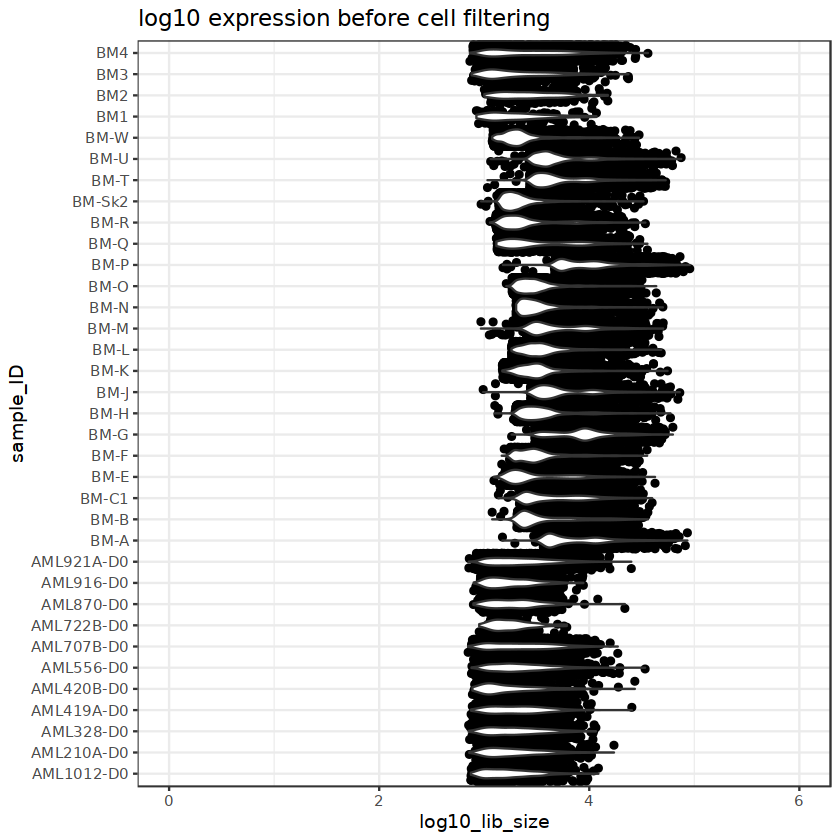

In [18]:
# visualize expression before any filtering
df <- data.frame(log10_lib_size = log10(anno_cells$total_counts_raw +1)
                 ,sample_ID = anno_cells$sample_ID
)
print(str(df))

print(ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL) +
        geom_violin() + 
        ggtitle("log10 expression before cell filtering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()
)
rm(df)

Warning message:
"The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
i Please use `after_stat(level)` instead."


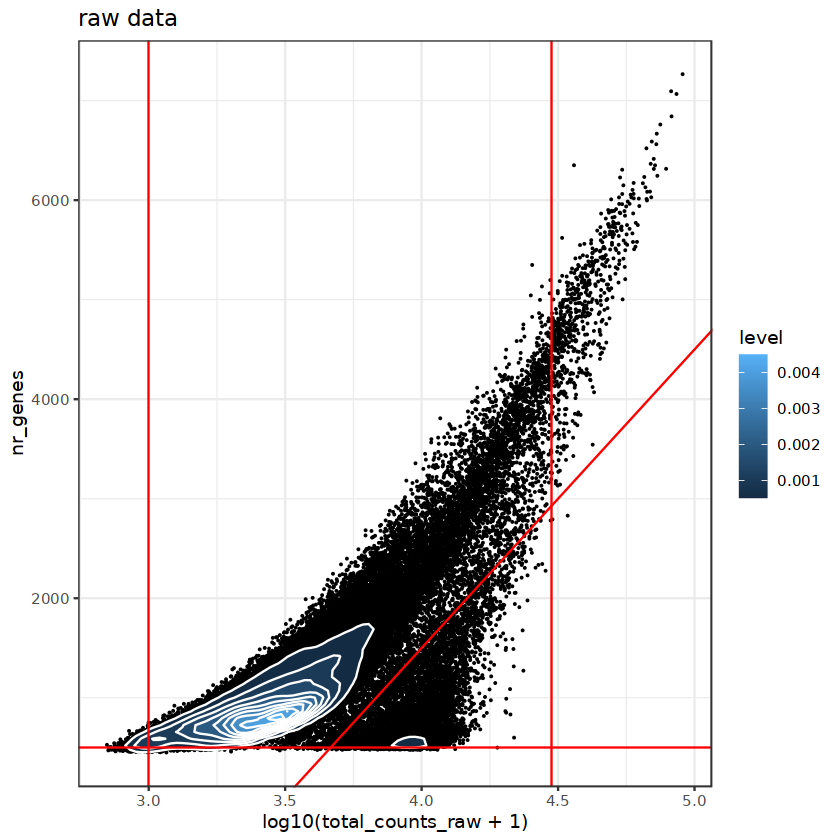

In [19]:
# plot log10 total counts vs nr genes
print(ggplot(data = anno_cells
             ,aes(x = log10(total_counts_raw +1)
                  ,y = nr_genes
             )
) +
        geom_point(size = 0.05) +
        stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white") +
        geom_abline(intercept = -10500
                    ,slope = 3000
                    , col = "red"
        ) +
        geom_vline(xintercept = log10(c(1000,30000)+1)
                   ,col = "red") +
        geom_hline(yintercept = 500
                   ,col = "red") +
        ggtitle("raw data")+
        theme_bw()
)

In [20]:
#apply cell filters
anno_cells_cf <- anno_cells[anno_cells$cell_filter,]
print("before cell filtering:")
cat("dim(anno_cells)", dim(anno_cells),"\n")
print("after cell filtering:")
cat("dim(anno_cells_cf)", dim(anno_cells_cf),"\n")

[1] "before cell filtering:"
dim(anno_cells) 87333 27 
[1] "after cell filtering:"
dim(anno_cells_cf) 78119 27 


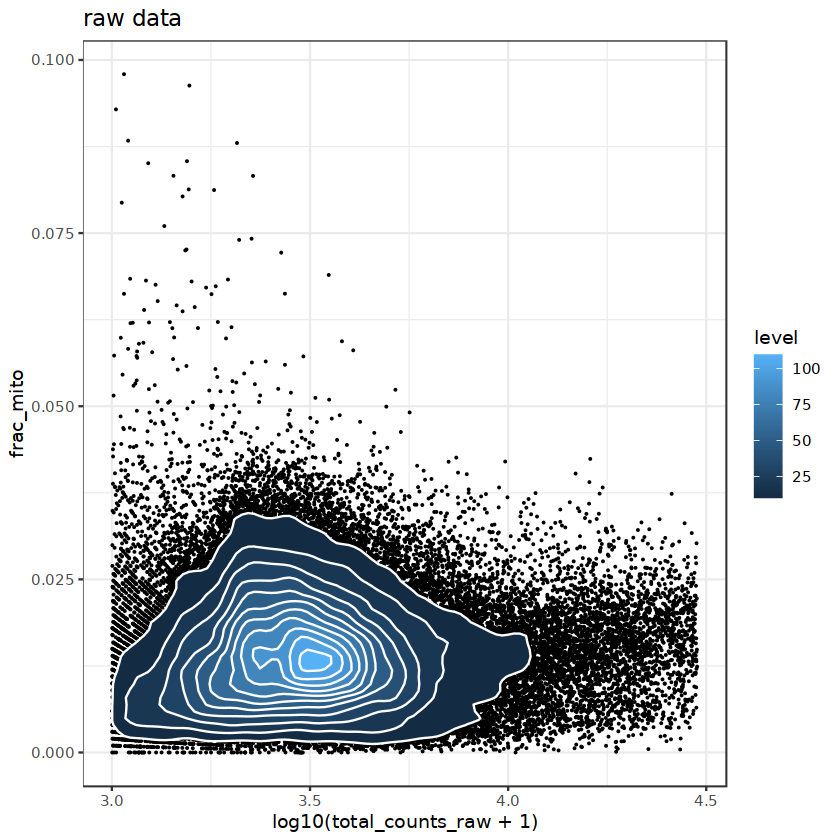

In [21]:
# plot log10 total counts vs fraction mito counts
print(ggplot(data = anno_cells_cf
             ,aes(x = log10(total_counts_raw +1)
                  ,y = frac_mito
             )
) +
        geom_point(size = 0.05) +
        stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white") +
        ggtitle("raw data")+
        theme_bw()
)

In [22]:
# save cell number in anno_samples
for(sample in unique(anno_cells$sample_ID)){
        
        my_anno <- anno_cells[anno_cells$sample_ID == sample,]
        my_anno_cf <- anno_cells_cf[anno_cells_cf$sample_ID == sample,]
        
        anno_samples$nr_cells_raw[anno_samples$sample_ID == sample] <- nrow(my_anno)
        anno_samples$nr_cells_cf[anno_samples$sample_ID == sample] <- nrow(my_anno_cf)
}
cat("anno_samples\n\n")
print(anno_samples)

anno_samples

    sample_ID patient_ID   dataset gender age health_status case_or_control day
1  AML1012-D0    AML1012 GSE116256      F  32           AML            case   0
2  AML210A-D0    AML210A GSE116256      M  67           AML            case   0
3   AML328-D0     AML328 GSE116256      F  74           AML            case   0
4  AML419A-D0    AML419A GSE116256      F  54           AML            case   0
5  AML420B-D0    AML420B GSE116256      M  58           AML            case   0
6   AML556-D0     AML556 GSE116256      M  70           AML            case   0
7  AML707B-D0    AML707B GSE116256      M  26           AML            case   0
8  AML722B-D0    AML722B GSE116256      F  52           AML            case   0
9   AML870-D0     AML870 GSE116256      M  32           AML            case   0
10  AML916-D0     AML916 GSE116256      F  57           AML            case   0
11 AML921A-D0    AML921A GSE116256      M  42           AML            case   0
12        BM1        BM1 G

In [23]:
# subset counts
print("counts dim:")
print("before cell filtering:")
print(dim(counts_cf))
print("subset counts")
counts_cf <- counts_cf[,anno_cells_cf$cell_ID]
print("after cell filtering:")
print(dim(counts_cf))

[1] "counts dim:"
[1] "before cell filtering:"
[1] 19303 87333
[1] "subset counts"
[1] "after cell filtering:"
[1] 19303 78119


In [24]:
# visualize expression after cell filtering and before population size filtering
df <- data.frame(log10_lib_size = log10(anno_cells_cf$total_counts_raw +1)
                 ,sample_ID = anno_cells_cf$sample_ID
)
print(str(df))

'data.frame':	78119 obs. of  2 variables:
 $ log10_lib_size: num  3.11 3.63 3.22 3.31 3.15 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


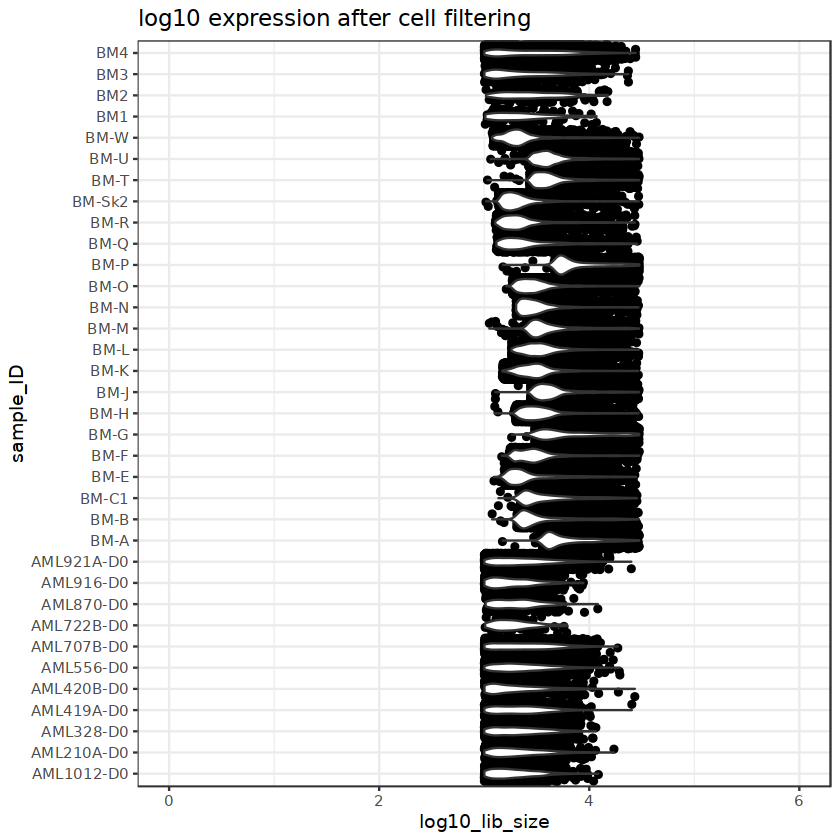

In [25]:
print(ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL) +
        geom_violin() + 
        ggtitle("log10 expression after cell filtering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()
)
rm(df)

In [26]:
anno_samples_cf <- anno_samples

anno_genes_cf <- anno_genes

### export

In [27]:
# # save counts_cf
# save(counts_cf, file = "counts_cf.RData")

# # save anno_cells_cf
# save(anno_cells_cf, file = "anno_cells_cf.RData")

# # save anno_samples_cf
# save(anno_samples_cf, file = "anno_samples_cf.RData")

# # # save anno_genes_cf
# save(anno_genes_cf, file = "anno_genes_cf.RData")

## Filter cell types

Cell types which have too few cells (less than 5 cells) per sample or are present in too few samples (less than in 30 samples) will be filtered out.

- **INPUT:**
    - ```counts_cf.RData``` 
    - ```anno_cells_cf.RData```
    - ```anno_samples_cf.RData```
    - ```anno_genes_cf.RData```
    - ```cell_relabelling.csv``` file containing unified cell type annotations. Stored in additional_input_files sub-directory.
    
- **NOTES:**

    The '_ctf' ending in the file names stands for cell type filter.
    
- **OUTPUT:**

    -  ```counts_cf_ctf.RData``` 
    -  ```anno_cells_cf_ctf.RData``` 
    -  ```anno_samples_cf_ctf.RData``` 
    -  ```anno_genes_cf_ctf.RData``` 

In [28]:
path_to_additional_files

[1] "/work/project/ladcol_006/analysis/AMLniche/comparativeAnalysis/scripts_for_paper/datasets/AML_healthy/additional_input_files/"

In [29]:
# load cell relabelling file
print("load cell_relabelling")

file="cell_relabelling.csv"
cell_relabelling <- read.csv(file = paste(path_to_additional_files,file,sep="")
                             ,sep = ";"
)
rownames(cell_relabelling) <- cell_relabelling$cell_type_original
print(str(cell_relabelling))

[1] "load cell_relabelling"
'data.frame':	40 obs. of  9 variables:
 $ cell_type_original    : chr  "B" "CD10+ B cells" "CD20+ B cells" "ProB" ...
 $ cell_type             : chr  "B" "B" "B" "B" ...
 $ source                : chr  "van Galen et al., 2019" "Oetjen et al., 2018" "Oetjen et al., 2018" "van Galen et al., 2019" ...
 $ cell_type_color       : chr  "green" "green" "green" "green" ...
 $ cell_type_color_hex   : chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
 $ cell_type_shape       : int  12 12 12 12 13 13 13 13 13 13 ...
 $ cell_subtype          : chr  "B" "B" "B" "B" ...
 $ cell_subtype_color    : chr  "green" "green" "green" "green" ...
 $ cell_subtype_color_hex: chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
NULL


In [30]:
# thresholds ####
threshold_celltype_size <- 5 # cells per celltype
print(paste("Celltype size filter: each cell type in each sample should have at least", threshold_celltype_size, "cells."))

[1] "Celltype size filter: each cell type in each sample should have at least 5 cells."


In [31]:
threshold_nr_samples <-30 # nr of samples in which a cell type should be present
print(paste("Number of samples filter: each cell type should be present in at least", threshold_nr_samples, "samples."))

[1] "Number of samples filter: each cell type should be present in at least 30 samples."


In [32]:
# color scheme for celltypes
color_celltype <- cell_relabelling$cell_type_color_hex[!duplicated(cell_relabelling$cell_type)]
names(color_celltype) <- cell_relabelling$cell_type[!duplicated(cell_relabelling$cell_type)]

In [33]:
# shape scheme for celltypes
shape_celltype <- cell_relabelling$cell_type_shape[!duplicated(cell_relabelling$cell_type)]
names(shape_celltype) <- cell_relabelling$cell_type[!duplicated(cell_relabelling$cell_type)]

In [34]:
# shape scheme for sample IDs
shape_sample <- c(1:11,1:24)
names(shape_sample) <- unique(anno_samples_cf$sample_ID)


In [35]:
# size scheme for sample IDs
size_sample <- c(rep(2,11),rep(1,24))
names(size_sample) <- unique(anno_samples_cf$sample_ID)

### filter


In [36]:
# store threshold values in the cell annotation file
anno_cells_cf$threshold_celltype_size <- threshold_celltype_size

In [37]:
# calculate celltype size
for(sample in unique(anno_cells_cf$sample_ID)){
        idx_sample <- anno_cells_cf$sample_ID == sample
        
        for(celltype in unique(anno_cells_cf$cell_type)){
                idx_celltype <- anno_cells_cf$cell_type == celltype
                
                idx_sample_celltype <- idx_sample & idx_celltype
                
                anno_cells_cf$celltype_size_cf[idx_sample_celltype] <- nrow(anno_cells_cf[idx_sample_celltype,])
        }
}

In [38]:
# calculate celltype size filter
anno_cells_cf$celltype_size_filter <- anno_cells_cf$celltype_size_cf >= anno_cells_cf$threshold_celltype_size

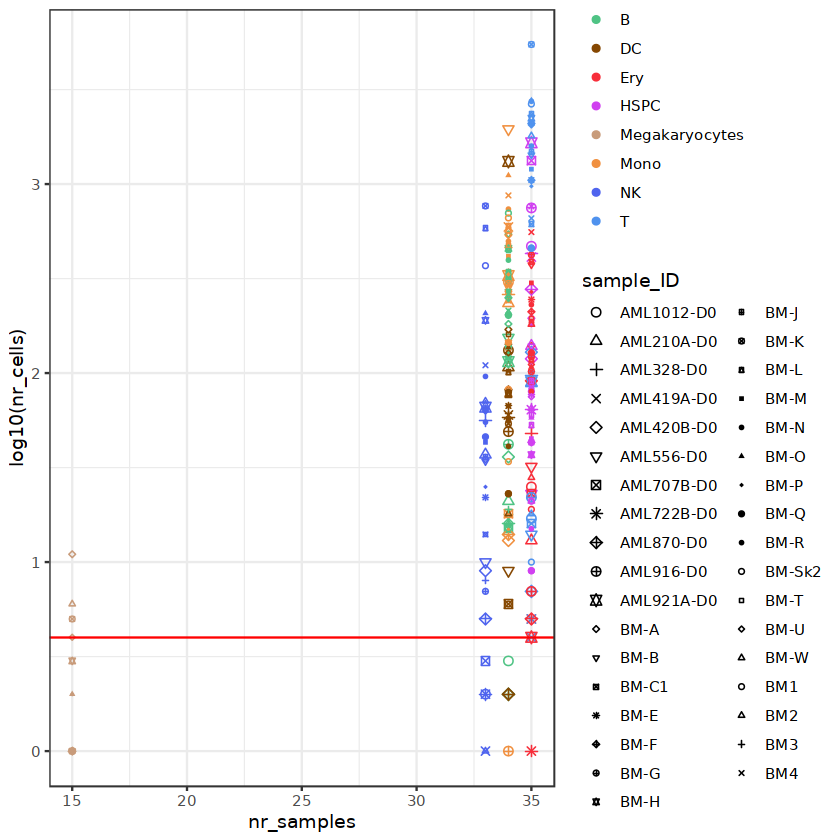

In [39]:
# visualize nr_samples vs log10_nr_cells before filtering
df <-unique(data.frame(sample_ID = anno_cells_cf$sample_ID
                       ,cell_type = anno_cells_cf$cell_type
                )
            )
df$nr_cells <- sapply(1: nrow(df)
                      ,function(i){
                              my_sample <- df$sample_ID[i]
                              my_celltype <- df$cell_type[i]
                              nr_cells <- sum((anno_cells_cf$sample_ID == my_sample) & (anno_cells_cf$cell_type == my_celltype))
                              nr_cells
                      })
df$nr_samples <- sapply(1: nrow(df)
                        ,function(i){
                                my_celltype <- df$cell_type[i]
                                idx_celltype <- anno_cells_cf$cell_type == my_celltype
                                nr_samples <- length(unique(anno_cells_cf$sample_ID[idx_celltype]))
                                nr_samples
                        })

ggplot(data = df
       ,aes(x=nr_samples
            ,y=log10(nr_cells)
            ,color=cell_type
            ,shape=sample_ID
            ,size = sample_ID
            )
       )+
        geom_point()+
        scale_color_manual(values=color_celltype)+
        scale_shape_manual(values=shape_sample)+
        scale_size_manual(values=size_sample)+
        geom_hline(yintercept = log10(threshold_celltype_size)-0.1
                   ,color = "red")+
        theme_bw()

In [40]:
# apply celltype size filter
# filter cell annotation file
anno_cells_cf_ctf <- anno_cells_cf[anno_cells_cf$celltype_size_filter,]
print("number of cells before celltype size filtering:")
print(nrow(anno_cells_cf))
print("number of cells after celltype size filtering:")
print(nrow(anno_cells_cf_ctf))

[1] "number of cells before celltype size filtering:"
[1] 78119
[1] "number of cells after celltype size filtering:"
[1] 78072


In [41]:
# filer count matrix
counts_cf_ctf <- counts_cf[,anno_cells_cf$celltype_size_filter]
rm(counts_cf)

In [42]:
print("following cell types didn't pass the celltype size filter:")
for(sample in unique(anno_cells_cf_ctf$sample_ID)){
        print(sample)
        my_anno_cf <- anno_cells_cf[anno_cells_cf$sample_ID == sample,]
        print(table(my_anno_cf[!my_anno_cf$celltype_size_filter,"cell_type"]))
}

[1] "following cell types didn't pass the celltype size filter:"
[1] "AML1012-D0"

 B NK 
 3  2 
[1] "AML210A-D0"
< table of extent 0 >
[1] "AML328-D0"
< table of extent 0 >
[1] "AML419A-D0"

NK  T 
 1  4 
[1] "AML420B-D0"

DC 
 2 
[1] "AML556-D0"
< table of extent 0 >
[1] "AML707B-D0"

NK 
 3 
[1] "AML722B-D0"

Ery  NK 
  1   2 
[1] "AML870-D0"

 B DC 
 2  2 
[1] "AML916-D0"

Mono 
   1 
[1] "AML921A-D0"

Ery 
  4 
[1] "BM1"
< table of extent 0 >
[1] "BM2"

NK 
 1 
[1] "BM3"
< table of extent 0 >
[1] "BM4"
< table of extent 0 >
[1] "BM-A"
< table of extent 0 >
[1] "BM-B"

Megakaryocytes 
             1 
[1] "BM-C1"

Megakaryocytes 
             1 
[1] "BM-E"

Megakaryocytes 
             1 
[1] "BM-F"

Megakaryocytes 
             1 
[1] "BM-G"

Megakaryocytes 
             1 
[1] "BM-H"

Megakaryocytes 
             3 
[1] "BM-J"
< table of extent 0 >
[1] "BM-K"
< table of extent 0 >
[1] "BM-L"
< table of extent 0 >
[1] "BM-M"
< table of extent 0 >
[1] "BM-N"

Megakaryocytes 
       

### filter for being present in the minimun number of samples

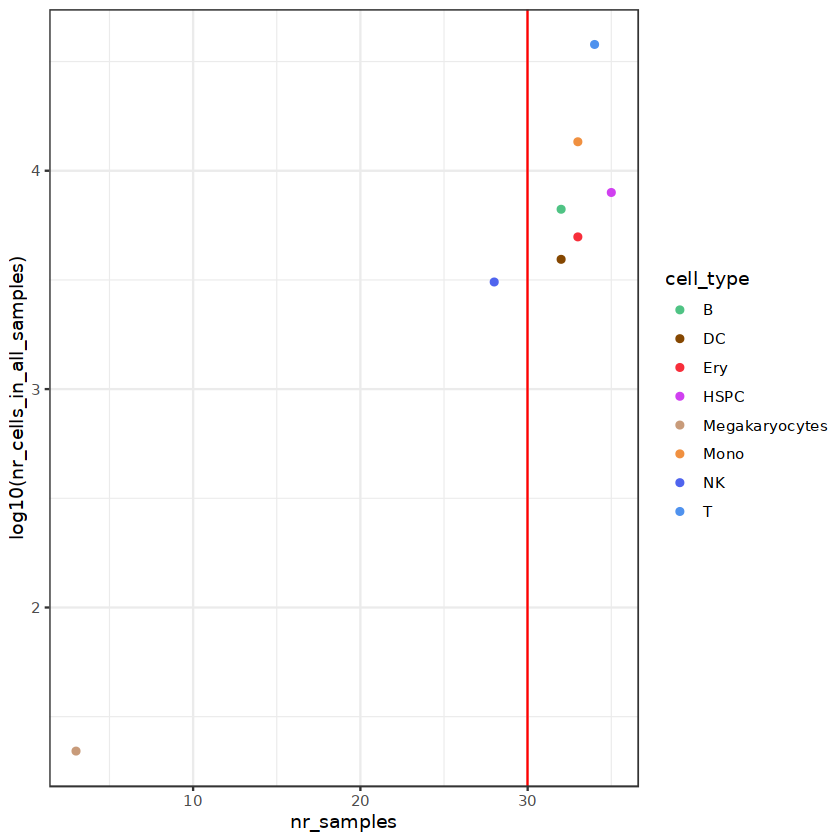

In [43]:
# visualize nr_samples vs log10_nr_cells_all_samples before filtering
df <-unique(data.frame(cell_type = anno_cells_cf_ctf$cell_type))

df$nr_cells_in_all_samples <- sapply(1: nrow(df)
                      ,function(i){
                              my_celltype <- df$cell_type[i]
                              nr_cells <- sum(anno_cells_cf_ctf$cell_type == my_celltype)
                              nr_cells
                      })

df$nr_samples <- sapply(1: nrow(df)
                        ,function(i){
                                my_celltype <- df$cell_type[i]
                                idx_celltype <- anno_cells_cf_ctf$cell_type == my_celltype
                                nr_samples <- length(unique(anno_cells_cf_ctf$sample_ID[idx_celltype]))
                                nr_samples
                        })

rownames(df) <- df$cell_type

ggplot(data = df
       ,aes(x = nr_samples
            ,y = log10(nr_cells_in_all_samples)
            ,color = cell_type
       )
) +
        geom_point() +
        scale_color_manual(values = color_celltype) +
        geom_vline(xintercept = threshold_nr_samples
                   ,color = "red")+
        theme_bw()

### filter out underrepresented cell types

In [44]:
print(paste("filter out celltypes present in less than"
             ,threshold_nr_samples
             ,"samples"))
print("following celltypes didn' pass the filter")
bad_celltypes <- rownames(df)[df$nr_samples < threshold_nr_samples]
print(bad_celltypes)

[1] "filter out celltypes present in less than 30 samples"
[1] "following celltypes didn' pass the filter"
[1] "NK"             "Megakaryocytes"


In [45]:
print("dim(counts_cf_ctf) before filtering")
print(dim(counts_cf_ctf))
counts_cf_ctf <- counts_cf_ctf[,!(anno_cells_cf_ctf$cell_type %in% bad_celltypes)]
print("dim(counts_cf_ctf) after filtering")
print(dim(counts_cf_ctf))
print("dim(anno_cells_cf_ctf) before filtering")
print(dim(anno_cells_cf_ctf))
anno_cells_cf_ctf <- anno_cells_cf_ctf[!(anno_cells_cf_ctf$cell_type %in% bad_celltypes),]
print("dim(anno_cells_cf_ctf) after filtering")
print(dim(anno_cells_cf_ctf))

[1] "dim(counts_cf_ctf) before filtering"
[1] 19303 78072
[1] "dim(counts_cf_ctf) after filtering"
[1] 19303 74956
[1] "dim(anno_cells_cf_ctf) before filtering"
[1] 78072    30
[1] "dim(anno_cells_cf_ctf) after filtering"
[1] 74956    30


In [46]:
# visualize expression after cell filtering and celltype size filtering
print("visualize expression after cell filtering and celltype size filtering")
df <- data.frame(log10_lib_size = log10(anno_cells_cf_ctf$total_counts_raw +1)
                 ,sample_ID = anno_cells_cf_ctf$sample_ID
)
print(str(df))

[1] "visualize expression after cell filtering and celltype size filtering"
'data.frame':	74956 obs. of  2 variables:
 $ log10_lib_size: num  3.11 3.63 3.22 3.31 3.15 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


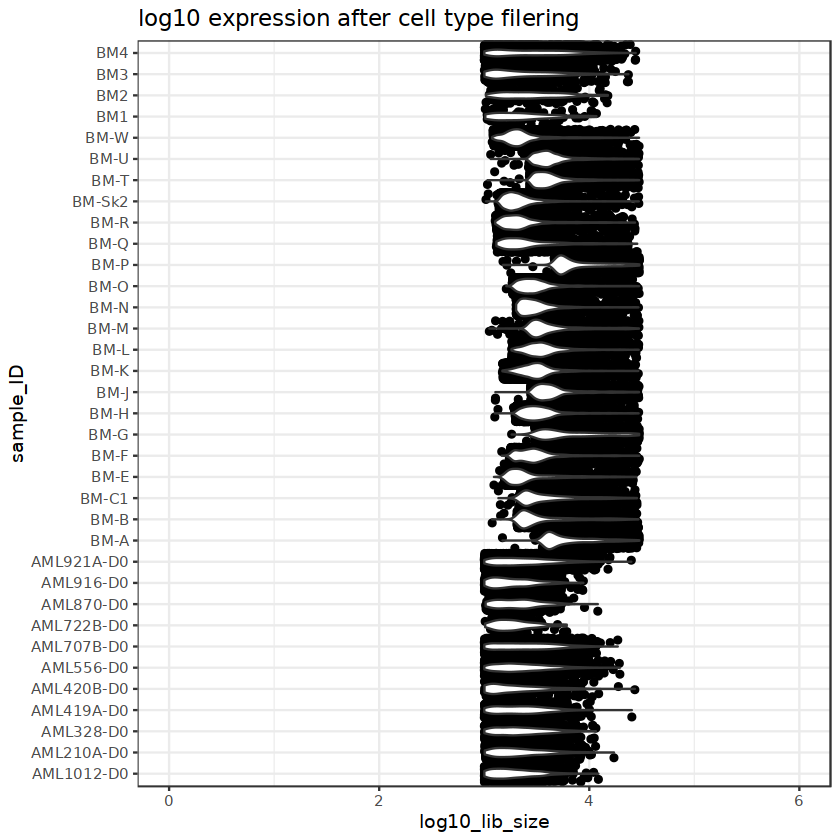

In [47]:
ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL) +
        geom_violin() + 
        ggtitle("log10 expression after cell type filering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()

rm(df)

In [48]:
# create anno_samples_cf_ctf
anno_samples_cf_ctf <- anno_samples_cf

In [49]:
# save cell number in anno_samples
for(sample in unique(anno_cells_cf_ctf$sample_ID)){
        
        my_anno_cf <- anno_cells_cf_ctf[anno_cells_cf_ctf$sample_ID == sample,]
        
        anno_samples_cf_ctf$nr_cells_cf_ctf[anno_samples_cf_ctf$sample_ID == sample] <- nrow(my_anno_cf)
}
print("anno_samples_cf_ctf")
print(anno_samples_cf_ctf)

[1] "anno_samples_cf_ctf"
    sample_ID patient_ID   dataset gender age health_status case_or_control day
1  AML1012-D0    AML1012 GSE116256      F  32           AML            case   0
2  AML210A-D0    AML210A GSE116256      M  67           AML            case   0
3   AML328-D0     AML328 GSE116256      F  74           AML            case   0
4  AML419A-D0    AML419A GSE116256      F  54           AML            case   0
5  AML420B-D0    AML420B GSE116256      M  58           AML            case   0
6   AML556-D0     AML556 GSE116256      M  70           AML            case   0
7  AML707B-D0    AML707B GSE116256      M  26           AML            case   0
8  AML722B-D0    AML722B GSE116256      F  52           AML            case   0
9   AML870-D0     AML870 GSE116256      M  32           AML            case   0
10  AML916-D0     AML916 GSE116256      F  57           AML            case   0
11 AML921A-D0    AML921A GSE116256      M  42           AML            case   0
12        BM1 

In [50]:
# create anno_gene_cf_ctf
anno_genes_cf_ctf <- anno_genes_cf

### export

In [51]:
# #save counts_cf_ctf.RData
# save(counts_cf_ctf, file = "counts_cf_ctf.RData")

# #save anno_cells_cf_ctf.RData
# save(anno_cells_cf_ctf, file = "anno_cells_cf_ctf.RData")

# #save anno_samples_cf_ctf.RData
# save(anno_samples_cf_ctf, file = "anno_samples_cf_ctf.RData")

# #save anno_genes_cf_ctf.RData
# save(anno_genes_cf_ctf, file = "anno_genes_cf_ctf.RData")

## Filter genes

Individual genes might be specific to certain cell types in cetrain health conditions. Here we will construct pseudo-bulk cell types (per sample) and filter out genes that have too low cumulative expression in these pseudo-bulks.

- **INPUT:**
    - ```counts_cf_ctf.RData``` 
    - ```anno_cells_cf_ctf.RData```
    - ```anno_samples_cf_ctf.RData```
    - ```anno_genes_cf_ctf.RData```
    - ```cell_relabelling.csv``` file containing unified cell type annotations. Stored in additional_input_files sub-directory.
    
- **NOTES:**

    The '_gf' ending in the file names stands for gene filter.
    
- **OUTPUT:**

    -  ```counts_cf_ctf_gf.RData```
    -  ```anno_cells_cf_ctf_gf.RData```
    -  ```anno_samples_cf_ctf_gf.RData```
    -  ```anno_genes_cf_ctf_gf.RData```

In [52]:
rownames(cell_relabelling) <- cell_relabelling$cell_type_original
print(str(cell_relabelling))

'data.frame':	40 obs. of  9 variables:
 $ cell_type_original    : chr  "B" "CD10+ B cells" "CD20+ B cells" "ProB" ...
 $ cell_type             : chr  "B" "B" "B" "B" ...
 $ source                : chr  "van Galen et al., 2019" "Oetjen et al., 2018" "Oetjen et al., 2018" "van Galen et al., 2019" ...
 $ cell_type_color       : chr  "green" "green" "green" "green" ...
 $ cell_type_color_hex   : chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
 $ cell_type_shape       : int  12 12 12 12 13 13 13 13 13 13 ...
 $ cell_subtype          : chr  "B" "B" "B" "B" ...
 $ cell_subtype_color    : chr  "green" "green" "green" "green" ...
 $ cell_subtype_color_hex: chr  "#4FC384" "#4FC384" "#4FC384" "#4FC384" ...
NULL


In [53]:
# thresholds
threshold_sum_pseudobulkCellType_expr <- 1
print(paste("threshold_sum_pseudobulkCellType_expr: >", threshold_sum_pseudobulkCellType_expr))

[1] "threshold_sum_pseudobulkCellType_expr: > 1"


In [54]:
# color scheme for celltypes
color_celltype <- cell_relabelling$cell_type_color_hex[!duplicated(cell_relabelling$cell_type)]
names(color_celltype) <- cell_relabelling$cell_type[!duplicated(cell_relabelling$cell_type)]

### process data

In [55]:
# construct pseudo sorted bulk

anno_cells_cf_ctf$cell_type_ID <- paste(anno_cells_cf_ctf$cell_type
                                        ,anno_cells_cf_ctf$sample_ID
                                        ,sep = "_"
)

In [56]:
cell_type_IDs <- unique(anno_cells_cf_ctf$cell_type_ID)
counts_raw_pseudobulkCellType <- as.data.frame(matrix(,nrow = nrow(counts_cf_ctf)
                                                    ,ncol = length(cell_type_IDs)
))

i <- 1
for(cell_type_ID in cell_type_IDs){
        #print(cell_type_ID)
        
        idx_cell_type_ID <- anno_cells_cf_ctf$cell_type_ID == cell_type_ID
        
        if(sum(idx_cell_type_ID) == 0){
                counts_raw_pseudobulkCellType[,i] <- 0
        } else if( sum(idx_cell_type_ID) == 1){
                counts_raw_pseudobulkCellType[,i] <- counts_cf_ctf[,idx_cell_type_ID]
        } else {
                counts_raw_pseudobulkCellType[,i] <- rowMeans(counts_cf_ctf[,idx_cell_type_ID])
        }
        
        i <- i+1
}

colnames(counts_raw_pseudobulkCellType) <- cell_type_IDs
rownames(counts_raw_pseudobulkCellType) <- rownames(counts_cf_ctf)
cat("str(counts_raw_pseudobulkCellType\n\n)")
print(str(counts_raw_pseudobulkCellType))

str(counts_raw_pseudobulkCellType

)'data.frame':	19303 obs. of  199 variables:
 $ HSPC_AML1012-D0: num  0.0554 0 0 0 0 ...
 $ Mono_AML1012-D0: num  0.1221 0 0 0.0033 0.0033 ...
 $ DC_AML1012-D0  : num  0.053 0 0 0 0 ...
 $ Ery_AML1012-D0 : num  0 0 0 0 0 0 0 0 0 0 ...
 $ T_AML1012-D0   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ B_AML210A-D0   : num  0.0476 0 0 0 0 ...
 $ Mono_AML210A-D0: num  0.06838 0 0 0.00427 0.00855 ...
 $ DC_AML210A-D0  : num  0.0748 0 0 0 0 ...
 $ Ery_AML210A-D0 : num  0.0769 0 0 0 0 ...
 $ HSPC_AML210A-D0: num  0.0863 0 0 0.0144 0.0288 ...
 $ T_AML210A-D0   : num  0.0787 0 0 0.0112 0 ...
 $ HSPC_AML328-D0 : num  0.17633 0.00232 0.00232 0.02552 0.03016 ...
 $ T_AML328-D0    : num  0.0825 0 0 0.0309 0 ...
 $ Mono_AML328-D0 : num  0.08494 0 0 0.00386 0.00772 ...
 $ DC_AML328-D0   : num  0.1724 0.0172 0 0 0.0172 ...
 $ Ery_AML328-D0  : num  0.0208 0 0 0 0.0208 ...
 $ B_AML328-D0    : num  0.125 0 0 0 0 0 0 0 0 0 ...
 $ Mono_AML419A-D0: num  0.13828 0.00843 0.00169 0 0.00675

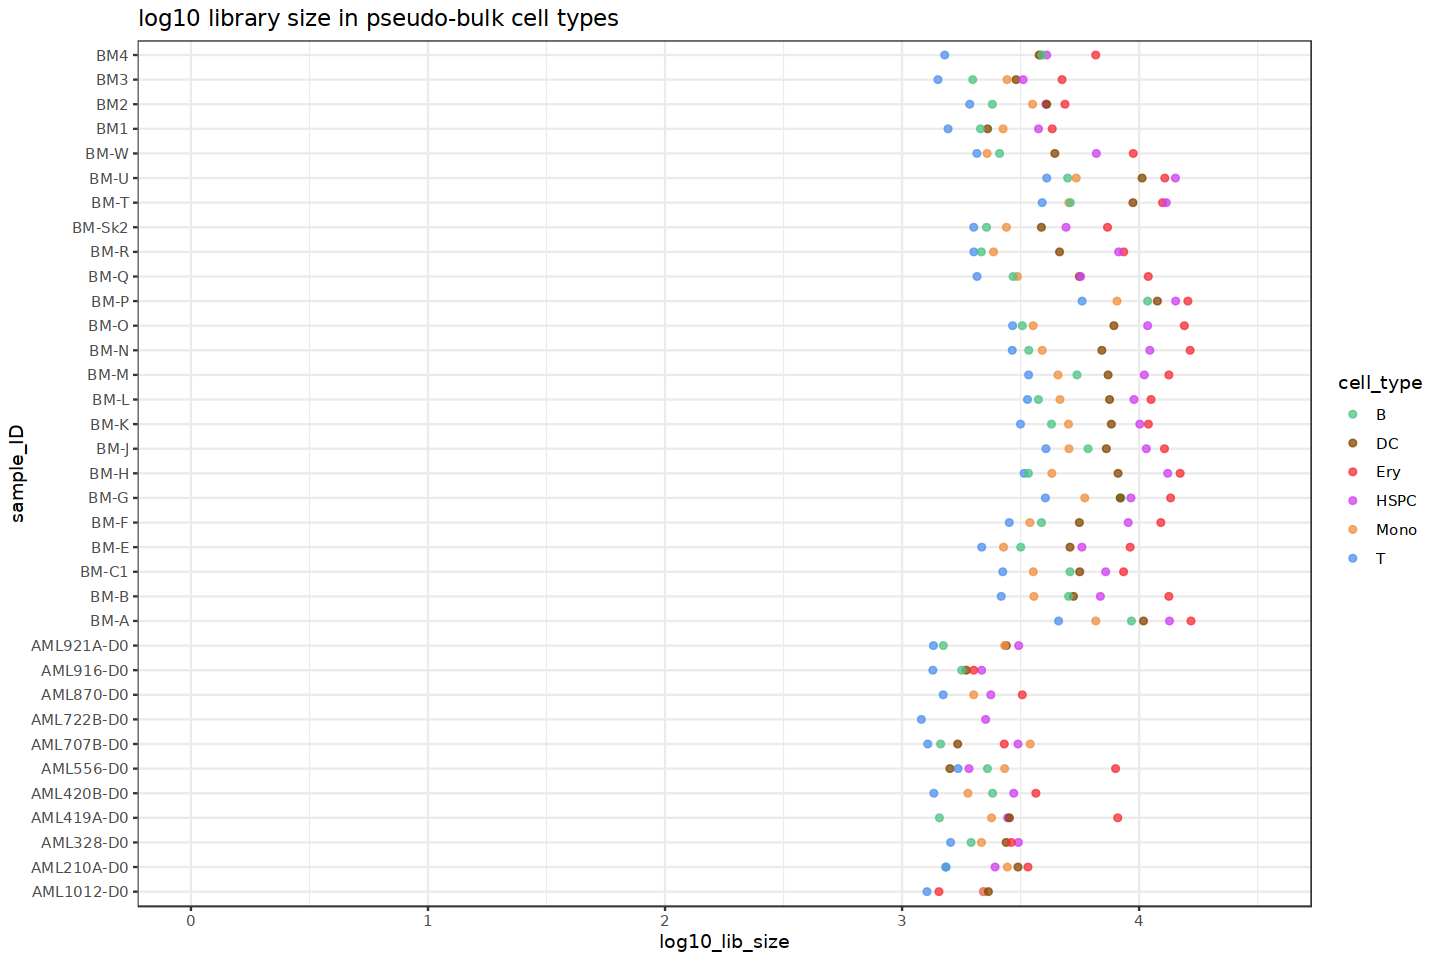

In [57]:
# visualize expression in pseudo sorted bulk
options(repr.plot.width=12, repr.plot.height=8) # plot margins

my_sampes <- sub("_.*", "", colnames(counts_raw_pseudobulkCellType))
df <- data.frame(log10_lib_size = log10(colSums(counts_raw_pseudobulkCellType) +1)
                 ,sample_ID = sub(".*_"
                                  ,""
                                  ,colnames(counts_raw_pseudobulkCellType)
                 )
                 ,cell_type = sub("_.*"
                                   ,""
                                   ,colnames(counts_raw_pseudobulkCellType)
                 )
)

ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
                  ,color = cell_type
             )
) +
        #geom_violin() + 
        geom_jitter(height = NULL
                    ,width = 0
                    ,alpha = 0.75) +
        ggtitle("log10 library size in pseudo-bulk cell types") +
        coord_flip() +
        ylim(c(0,4.5)) +
        scale_color_manual(values = color_celltype)+
        theme_bw()

### visualize possible filtering parameters

In [58]:
nr_expressing_cell_types <- rowSums(counts_raw_pseudobulkCellType != 0)

anno_genes_cf_ctf$sum_pseudobulkCellType_expr = rowSums(as.matrix(counts_raw_pseudobulkCellType))
anno_genes_cf_ctf$sum_pseudobulkCellType_expr_threshold <- rep(threshold_sum_pseudobulkCellType_expr, nrow(anno_genes_cf_ctf))
anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter <- anno_genes_cf_ctf$sum_pseudobulkCellType_expr > threshold_sum_pseudobulkCellType_expr
print(str(anno_genes_cf_ctf))

'data.frame':	19303 obs. of  7 variables:
 $ gene_symbol                          : chr  "A1BG" "A1BG-AS1" "A1CF" "A2M" ...
 $ is_in_LR_database                    : logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ isLigand                             : logi  FALSE FALSE FALSE TRUE FALSE FALSE ...
 $ isReceptor                           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ sum_pseudobulkCellType_expr          : num  40.7567 1.6697 0.0688 0.9928 2.7369 ...
 $ sum_pseudobulkCellType_expr_threshold: num  1 1 1 1 1 1 1 1 1 1 ...
 $ sum_pseudobulkCellType_expr_filter   : logi  TRUE TRUE FALSE FALSE TRUE FALSE ...
NULL


In [59]:
print(paste("we have"
            ,nrow(counts_cf_ctf)
            ,"genes before filtering"
)
)
print(paste("we have"
            ,sum(anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter)
            ,"genes after filtering"
)
)

[1] "we have 19303 genes before filtering"
[1] "we have 12485 genes after filtering"


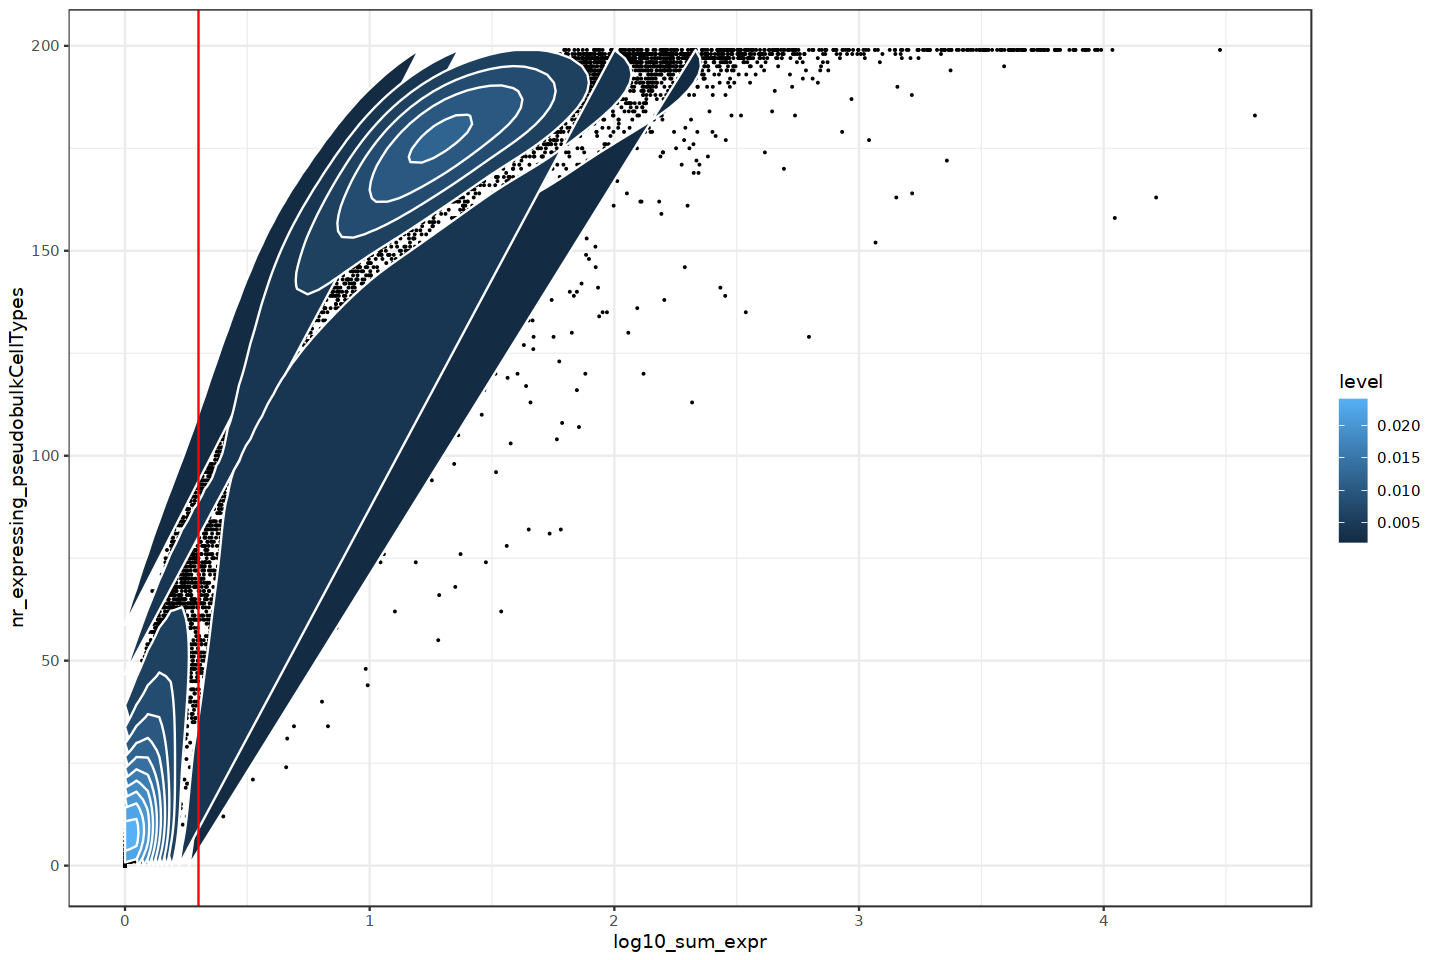

In [60]:
# plot sum expression vs nr expressing pseudobulk cell types
df <- data.frame(log10_sum_expr = log10(rowSums(as.matrix(counts_raw_pseudobulkCellType)) +1)
                 ,nr_expressing_pseudobulkCellTypes = nr_expressing_cell_types
                 ,passed_gene_filter = anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter
)

ggplot(data = df
             ,aes(x = log10_sum_expr
                  ,y = nr_expressing_pseudobulkCellTypes
             )
) +
        geom_point(size = 0.05)+
        stat_density_2d(aes(fill = ..level..), geom = "polygon", colour="white") +
        geom_vline(xintercept = log10(threshold_sum_pseudobulkCellType_expr+1), color = "red")+
        theme_bw()

### filter genes

In [61]:
# filter genes by gene filter from the gene annotation file
counts_cf_ctf_gf <- counts_cf_ctf[anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter,]
print(dim(counts_cf_ctf_gf))

[1] 12485 74956


In [62]:
# filter gene annotation by gene filter from the gene annotation file
anno_genes_cf_ctf_gf <- anno_genes_cf_ctf[anno_genes_cf_ctf$sum_pseudobulkCellType_expr_filter,]

In [63]:
# store total counts per cell after gene filtering in the cell annotation file
anno_cells_cf_ctf_gf <- anno_cells_cf_ctf
anno_cells_cf_ctf_gf$total_counts_raw_cf_ctf_gf <- colSums(counts_cf_ctf_gf)

In [64]:
# store total counts per sample after gene filtering in the sample annotation file
anno_samples_cf_ctf_gf <- anno_samples_cf_ctf
anno_samples_cf_ctf_gf$total_counts_raw_cf_ctf_gf <- sapply(anno_samples_cf_ctf_gf$sample_ID
                                                         ,function(sample){
                                                                 idx_sample <- anno_cells_cf_ctf_gf$sample_ID == sample
                                                                 sum(anno_cells_cf_ctf_gf$total_counts_raw_cf_ctf_gf[idx_sample])
                                                         })

In [65]:
# store number of cell types per sample after gene filtering in the sample annotation file
anno_samples_cf_ctf_gf$nr_celltypes_cf_ctf_gf <- sapply(anno_samples_cf_ctf_gf$sample_ID
                                                         ,function(sample){
                                                                 idx_sample <- anno_cells_cf_ctf_gf$sample_ID == sample
                                                                 length(unique(anno_cells_cf_ctf_gf$cell_type[idx_sample]))
                                                         })

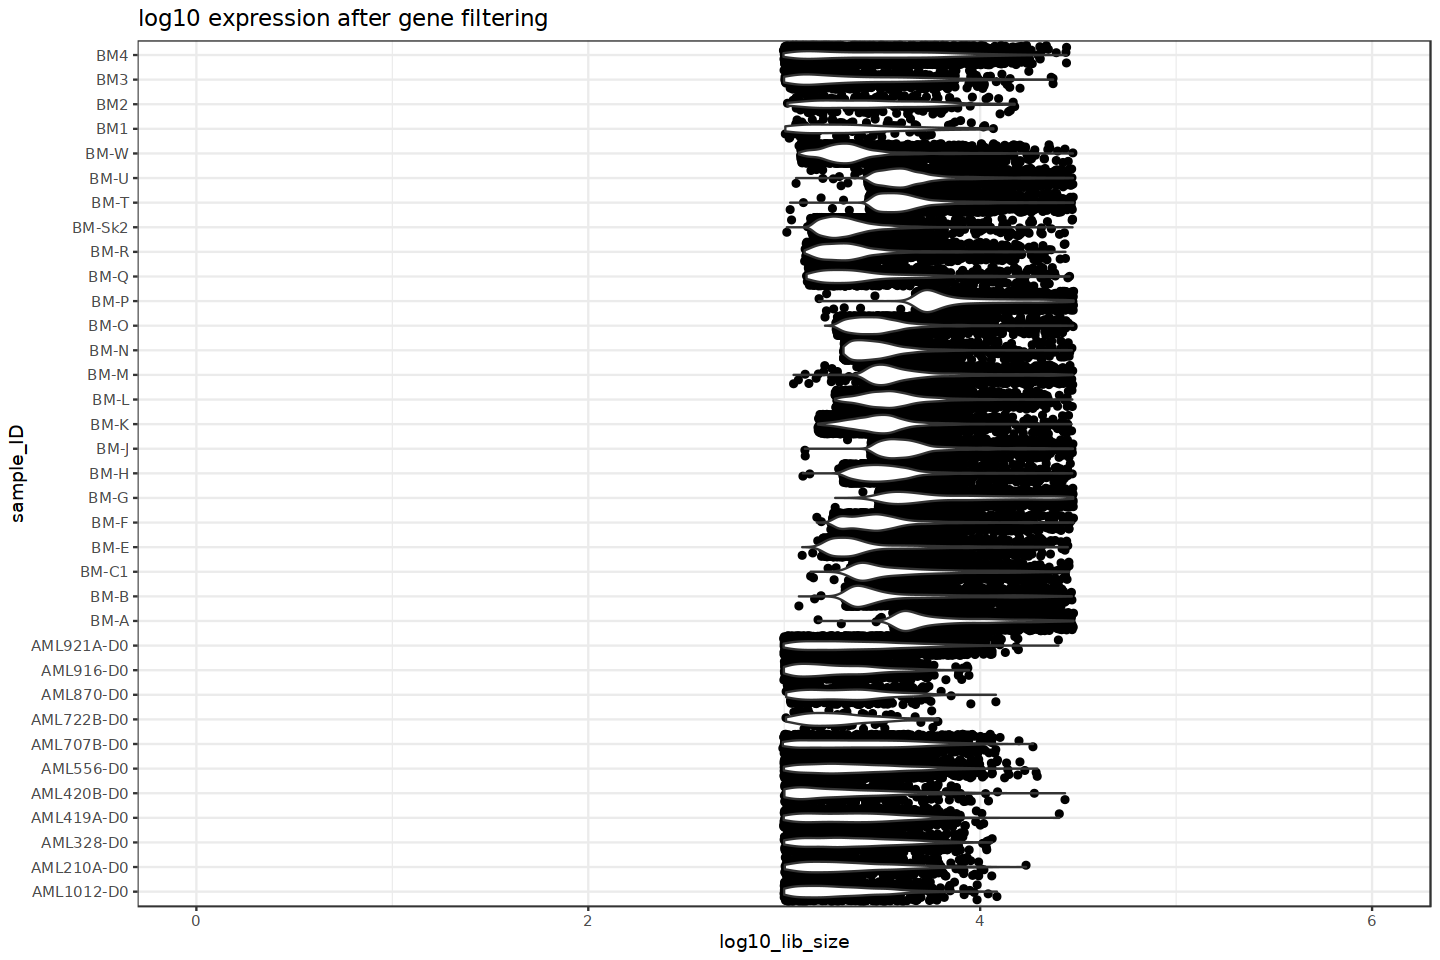

In [66]:
# visualize the expression after gene filter
df <- data.frame(log10_lib_size = log10(anno_cells_cf_ctf_gf$total_counts_raw_cf_ctf_gf +1)
                 ,sample_ID = anno_cells_cf_ctf_gf$sample_ID
)

ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL) +
        geom_violin() + 
        ggtitle("log10 expression after gene filtering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()

rm(df)

### export

In [67]:
# #save counts_cf_ctf_gf.RData
# save(counts_cf_ctf_gf, file = "counts_cf_ctf_gf.RData")

# #save anno_cells_cf_ctf_gf.RData
# save(anno_cells_cf_ctf_gf, file = "anno_cells_cf_ctf_gf.RData")

# #save anno_samples_cf_ctf_gf.RData
# save(anno_samples_cf_ctf_gf, file = "anno_samples_cf_ctf_gf.RData")
# 3
# #save anno_genes_cf_ctf_gf.RData
# save(anno_genes_cf_ctf_gf, file = "anno_genes_cf_ctf_gf.RData")

## Filter samples

Samples with less than 5 cell types will be filtered out.

- **INPUT:**
    - ```counts_cf_ctf_gf.RData``` 
    - ```anno_cells_cf_ctf_gf.RData```
    - ```anno_samples_cf_ctf_gf.RData```
    - ```anno_genes_cf_ctf_gf.RData```
    
- **NOTES:**

    The '_sf' ending in the file names stands for sample filter.
    
- **OUTPUT:**

    -  ```counts_cf_ctf_gf_sf.RData``` 
    -  ```anno_cells_cf_ctf_gf_sf.RData``` 
    -  ```anno_samples_cf_ctf_gf_sf.RData```
    -  ```anno_genes_cf_ctf_gf_sf.RData```

In [68]:
# print("load counts")
# load("./AML_healthy/counts_cf_ctf_gf.RData")
# print("dim(counts_cf_ctf_gf)")
# print(dim(counts_cf_ctf_gf))

# # load cell annotation
# print("load cell annotation")
# load("./AML_healthy/anno_cells_cf_ctf_gf.RData")
# print("str(anno_cells_cf_ctf_gf)")
# print(str(anno_cells_cf_ctf_gf))

# # load sample annotation
# print("load sample annotation")
# load("./AML_healthy/anno_samples_cf_ctf_gf.RData")
# print("str(anno_samples_cf_ctf_gf)")
# print(str(anno_samples_cf_ctf_gf))

# # load gene annotation
# print("load gene annotation")
# load("./AML_healthy/anno_genes_cf_ctf_gf.RData")
# print("str(anno_genes_cf_ctf_gf)")
# print(str(anno_genes_cf_ctf_gf))

In [69]:
# shape scheme for sample IDs
shape_sample <- c(1:11,1:24)
names(shape_sample) <- unique(anno_samples_cf_ctf_gf$sample_ID)

In [70]:
# size scheme for sample IDs
size_sample <- c(rep(2,11),rep(1,24))
names(size_sample) <- unique(anno_samples_cf_ctf_gf$sample_ID)

In [71]:
# thresholds ####
threshold_nr_celltypes <- 5
print(paste("A sample should contain at least"
            ,threshold_nr_celltypes
            ,"cell types"))

[1] "A sample should contain at least 5 cell types"


### filter

In [72]:
anno_samples_cf_ctf_gf$threshold_nr_celltypes <- paste("greater or equal"
                                              ,threshold_nr_celltypes)
anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes <- anno_samples_cf_ctf_gf$nr_celltypes_cf_ctf_gf >= threshold_nr_celltypes


In [73]:
print(paste("we have"
            ,sum(anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes)
            ,"samples that passed the threshold"))
print(paste("we have"
            ,sum(!anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes)
            ,"samples that didn't pass the threshold:"))

[1] "we have 33 samples that passed the threshold"
[1] "we have 2 samples that didn't pass the threshold:"


In [74]:
bad_samples <- anno_samples_cf_ctf_gf$sample_ID[!anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes]
print(bad_samples)

[1] "AML722B-D0" "AML870-D0" 


### visualization

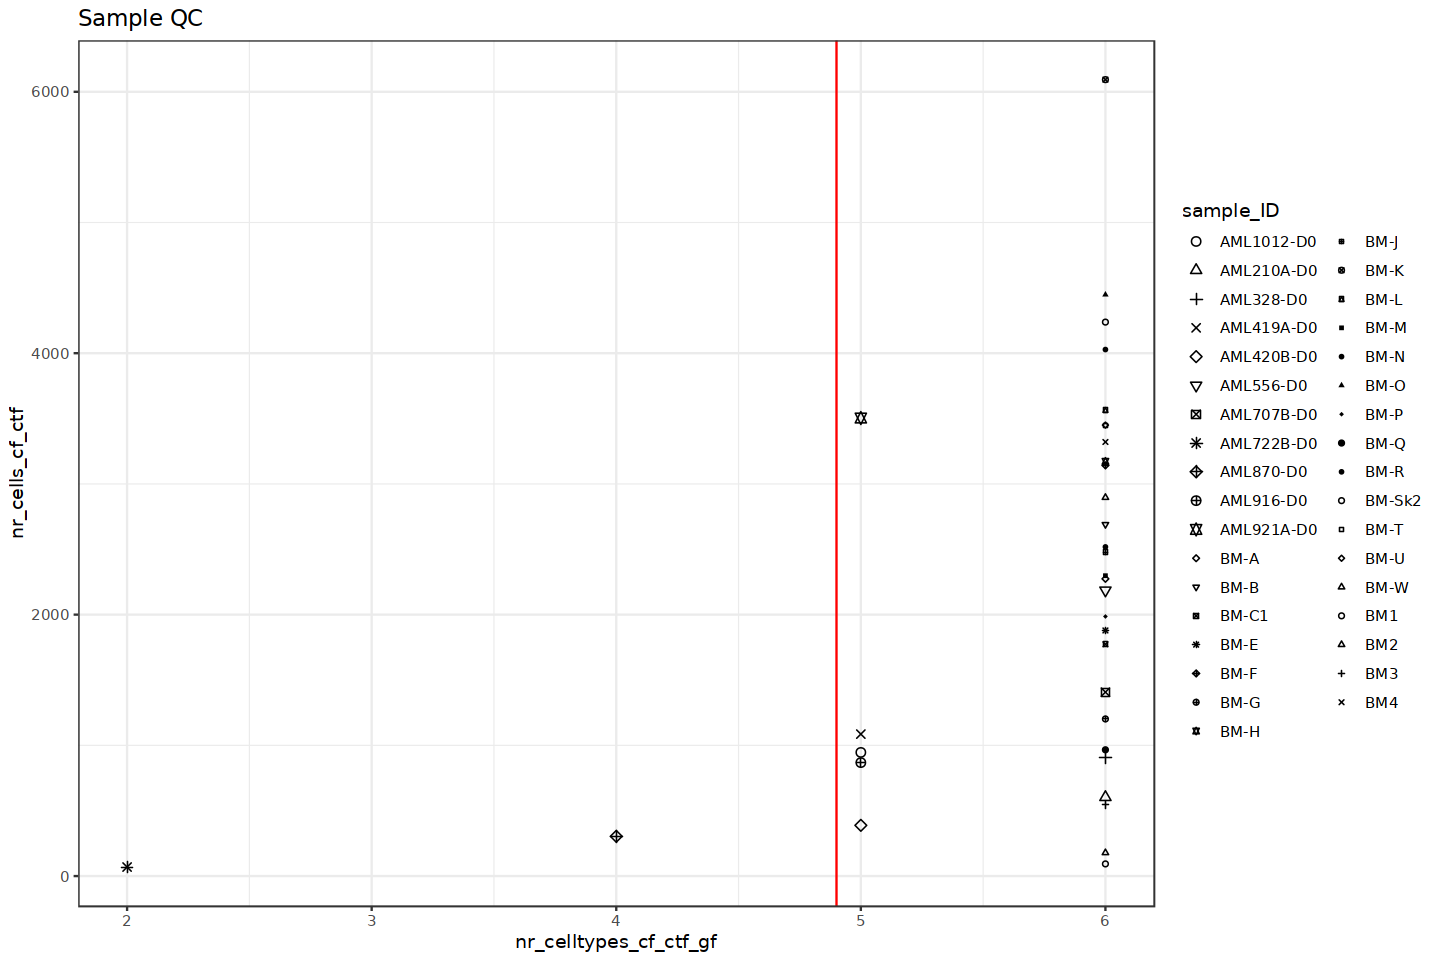

In [75]:
ggplot(data = anno_samples_cf_ctf_gf
       ,aes(x = nr_celltypes_cf_ctf_gf
            ,y = nr_cells_cf_ctf
            #,color = sample_ID
            ,shape = sample_ID
            ,size = sample_ID
       )
) +
        geom_point()+
        ggtitle("Sample QC") +
        geom_vline(xintercept = threshold_nr_celltypes- 0.1
                   ,color = "red")+
        scale_shape_manual(values=shape_sample)+
        scale_size_manual(values=size_sample)+
        theme_bw()

In [76]:
#subset anno_anno_samples_cf_ctf_gf

print("dim(anno_samples_cf_ctf_gf) before filtering")
print(dim(anno_samples_cf_ctf_gf))
anno_samples_cf_ctf_gf_sf <- anno_samples_cf_ctf_gf[anno_samples_cf_ctf_gf$passed_threshold_nr_celltypes,]
print("dim(anno_samples_cf_ctf_gf_sf) after filtering")
print(dim(anno_samples_cf_ctf_gf_sf))

[1] "dim(anno_samples_cf_ctf_gf) before filtering"
[1] 35 15
[1] "dim(anno_samples_cf_ctf_gf_sf) after filtering"
[1] 33 15


In [77]:
#subset anno_cells

print("dim(anno_cells_cf_ctf_gf) before filtering")
print(dim(anno_cells_cf_ctf_gf))
idx_bad <- anno_cells_cf_ctf_gf$sample_ID %in% bad_samples
anno_cells_cf_ctf_gf_sf <- anno_cells_cf_ctf_gf[!idx_bad,]
print("dim(anno_cells_cf_ctf_gf_sf) after filtering")
print(dim(anno_cells_cf_ctf_gf_sf))

[1] "dim(anno_cells_cf_ctf_gf) before filtering"
[1] 74956    32
[1] "dim(anno_cells_cf_ctf_gf_sf) after filtering"
[1] 74583    32


In [78]:
#subset counts_cf_ctf_gf

print("dim(counts_cf_ctf_gf) before filtering")
print(dim(counts_cf_ctf_gf))
counts_cf_ctf_gf_sf <- counts_cf_ctf_gf[,!idx_bad]
print("dim(counts_cf_ctf_gf_sf) after filtering")
print(dim(counts_cf_ctf_gf_sf))

[1] "dim(counts_cf_ctf_gf) before filtering"
[1] 12485 74956
[1] "dim(counts_cf_ctf_gf_sf) after filtering"
[1] 12485 74583


In [79]:
anno_cells_cf_ctf_gf_sf$total_counts_raw_cf_ctf_gf_sf <- colSums(counts_cf_ctf_gf_sf)

anno_genes_cf_ctf_gf_sf <- anno_genes_cf_ctf_gf

In [80]:
# visualize expression after sample filter

df <- data.frame(log10_lib_size = log10(anno_cells_cf_ctf_gf_sf$total_counts_raw_cf_ctf_gf_sf +1)
                 ,sample_ID = anno_cells_cf_ctf_gf_sf$sample_ID
)
print(str(df))

'data.frame':	74583 obs. of  2 variables:
 $ log10_lib_size: num  3.11 3.63 3.22 3.31 3.15 ...
 $ sample_ID     : chr  "AML1012-D0" "AML1012-D0" "AML1012-D0" "AML1012-D0" ...
NULL


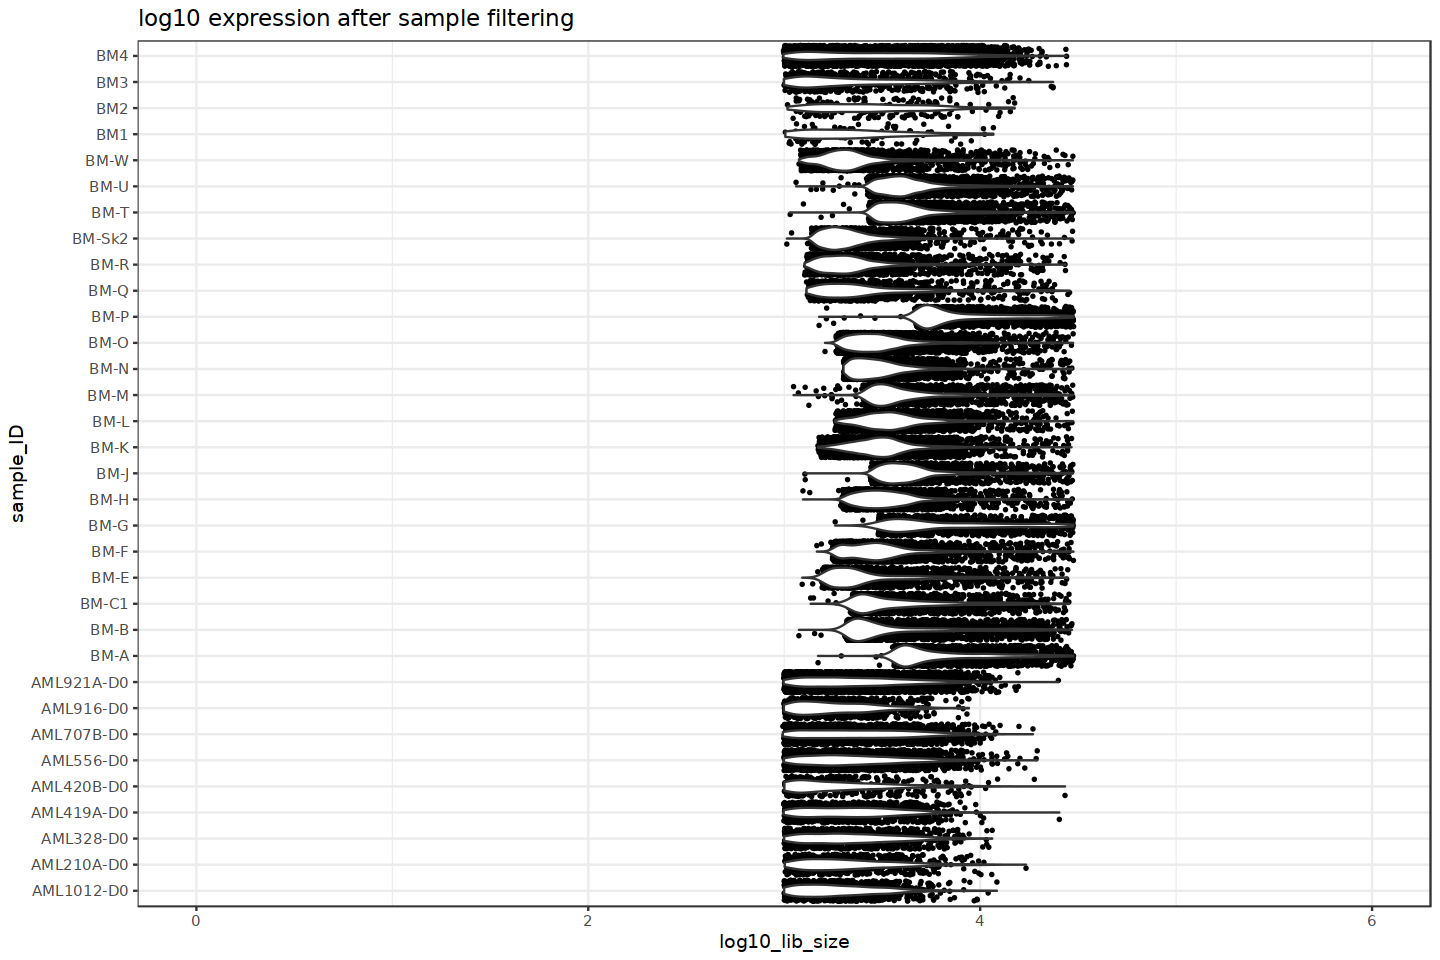

In [81]:
ggplot(data = df
             ,aes(x = sample_ID
                  ,y = log10_lib_size
             )
) +
        geom_jitter(height = NULL
                    ,size = 0.5) +
        geom_violin() + 
        ggtitle("log10 expression after sample filtering") +
        coord_flip() +
        ylim(c(0,6))+
        theme_bw()

rm(df)

### heatmap

In [82]:
#visualize cell number per cell type per sample

df <- table(data.frame(sample_ID = anno_cells_cf_ctf_gf_sf$sample_ID
                       ,cell_type = anno_cells_cf_ctf_gf_sf$cell_type)
            )
df <- t(matrix(df
               ,ncol = ncol(df)
               ,dimnames=dimnames(df)
               )
        )

In [83]:
# install.packages("circlize")

In [84]:
library("circlize")

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




In [85]:
library("ComplexHeatmap")

In [86]:
col_fun = colorRamp2(c(0
                       ,1
                       ,100
                       ,1000
                       , max(df)), c("white"
                                     ,"lightgoldenrod1"
                                     ,"gold"
                                     ,"salmon"
                                     , "darkred"))

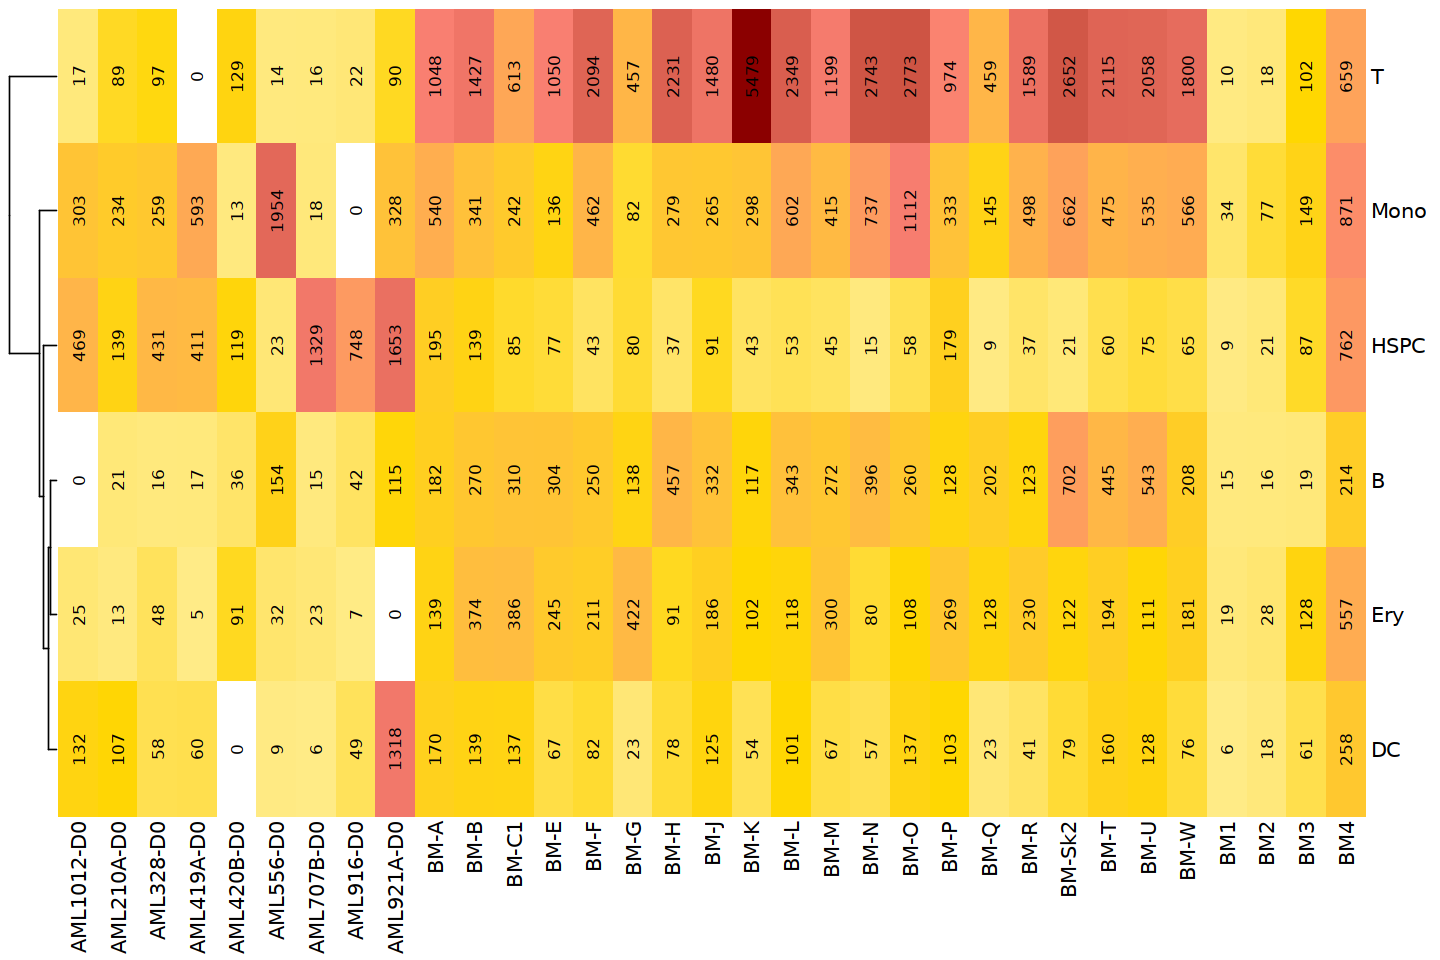

In [87]:
Heatmap(df
        ,cluster_columns = FALSE
        ,col = col_fun
        ,name="nr cells"
        ,show_heatmap_legend = FALSE
        ,cell_fun = function(j, i, x, y, width, height, fill) {
                grid.text(as.character(df[i, j])#sprintf("%.1f", df[i, j])
                          , x
                          , y
                          , gp = gpar(fontsize = 10
                                      )
                          ,rot=90
                          )
                }
        )

### export

In [88]:
#save counts_cf_ctf_gf_sf.RData
save(counts_cf_ctf_gf_sf, file = "counts_cf_ctf_gf_sf.RData")

#save anno_cells_cf_ctf_gf_sf.RData
save(anno_cells_cf_ctf_gf_sf, file = "anno_cells_cf_ctf_gf_sf.RData")

#save anno_samples_cf_ctf_gf_sf.RData
save(anno_samples_cf_ctf_gf_sf, file = "anno_samples_cf_ctf_gf_sf.RData")

#save anno_genes_cf_ctf_gf_sf.RData
save(anno_genes_cf_ctf_gf_sf, file = "anno_genes_cf_ctf_gf_sf.RData")